Дано: данные 500 клиентов компании сотовой связи "Мегалайн". **Задача** - узнать, какой тариф приносит больше денег

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from math import ceil 
from scipy import stats as st
import pandas as pd
pd.set_option('display.max_columns', 30)

In [2]:
users = pd.read_csv('users.csv')
calls = pd.read_csv('calls.csv')
messages = pd.read_csv('messages.csv')
internet = pd.read_csv('internet.csv')
tariffs = pd.read_csv('tariffs.csv')

Объединим таблицы по идентификатору пользователя и посмотрим первые 10 строк таблиц.

In [3]:
data_calls = users.merge(calls)
data_messages = users.merge(messages)
data_internet = users.merge(internet)

In [4]:
data_calls.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 202607 entries, 0 to 202606
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   user_id     202607 non-null  int64  
 1   age         202607 non-null  int64  
 2   churn_date  9919 non-null    object 
 3   city        202607 non-null  object 
 4   first_name  202607 non-null  object 
 5   last_name   202607 non-null  object 
 6   reg_date    202607 non-null  object 
 7   tariff      202607 non-null  object 
 8   id          202607 non-null  object 
 9   call_date   202607 non-null  object 
 10  duration    202607 non-null  float64
dtypes: float64(1), int64(2), object(8)
memory usage: 18.5+ MB


In [5]:
data_calls.head(10)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,id,call_date,duration
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000_0,2018-07-25,0.00
1,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000_1,2018-08-17,0.00
2,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000_2,2018-06-11,2.85
3,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000_3,2018-09-21,13.80
4,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000_4,2018-12-15,5.18
5,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000_5,2018-11-02,0.00
6,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000_6,2018-10-18,0.00
7,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000_7,2018-08-22,18.31
8,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000_8,2018-09-15,18.44
9,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000_9,2018-08-15,0.00


In [6]:
data_messages.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123036 entries, 0 to 123035
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       123036 non-null  int64 
 1   age           123036 non-null  int64 
 2   churn_date    5339 non-null    object
 3   city          123036 non-null  object
 4   first_name    123036 non-null  object
 5   last_name     123036 non-null  object
 6   reg_date      123036 non-null  object
 7   tariff        123036 non-null  object
 8   id            123036 non-null  object
 9   message_date  123036 non-null  object
dtypes: int64(2), object(8)
memory usage: 10.3+ MB


In [7]:
data_messages.head(10)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,id,message_date
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000_0,2018-06-27
1,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000_1,2018-10-08
2,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000_2,2018-08-04
3,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000_3,2018-06-16
4,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000_4,2018-12-05
5,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000_5,2018-06-20
6,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000_6,2018-11-19
7,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000_7,2018-10-29
8,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000_8,2018-06-25
9,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000_9,2018-12-18


In [8]:
data_internet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   user_id       149396 non-null  int64  
 1   age           149396 non-null  int64  
 2   churn_date    7748 non-null    object 
 3   city          149396 non-null  object 
 4   first_name    149396 non-null  object 
 5   last_name     149396 non-null  object 
 6   reg_date      149396 non-null  object 
 7   tariff        149396 non-null  object 
 8   Unnamed: 0    149396 non-null  int64  
 9   id            149396 non-null  object 
 10  mb_used       149396 non-null  float64
 11  session_date  149396 non-null  object 
dtypes: float64(1), int64(3), object(8)
memory usage: 14.8+ MB


In [9]:
data_internet.head(10)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,Unnamed: 0,id,mb_used,session_date
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0,1000_0,112.95,2018-11-25
1,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1,1000_1,1052.81,2018-09-07
2,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,2,1000_2,1197.26,2018-06-25
3,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,3,1000_3,550.27,2018-08-22
4,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,4,1000_4,302.56,2018-09-24
5,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,1000_5,399.97,2018-10-02
6,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,6,1000_6,540.08,2018-09-07
7,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,7,1000_7,415.70,2018-07-11
8,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,8,1000_8,505.40,2018-10-08
9,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,9,1000_9,345.54,2018-09-03


Какой-то столбец Unnamed: 0 вылез после объединения таблиц. Избавимся.

In [10]:
del data_internet['Unnamed: 0']

Выведем месяцы из дат для подсчета значений по месяцам.

In [11]:
data_calls['call_date'] = pd.to_datetime(data_calls['call_date'], format='%Y-%m-%d')
data_calls['month'] = data_calls['call_date'].dt.month

data_messages['message_date'] = pd.to_datetime(data_messages['message_date'], format='%Y-%m-%d')
data_messages['month'] = data_messages['message_date'].dt.month

data_internet['session_date'] = pd.to_datetime(data_internet['session_date'], format='%Y-%m-%d')
data_internet['month'] = data_internet['session_date'].dt.month

Переведем значения секунд каждого разговора по условиям тарифа в минуты.

In [12]:
def convert_sec_in_min(row):
    seconds = row['duration']
    return ceil(seconds / 60)
    
data_calls['duration_in_min'] = data_calls.apply(convert_sec_in_min, axis=1)
data_calls.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,id,call_date,duration,month,duration_in_min
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000_0,2018-07-25,0.00,7,0
1,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000_1,2018-08-17,0.00,8,0
2,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000_2,2018-06-11,2.85,6,1
3,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000_3,2018-09-21,13.80,9,1
4,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000_4,2018-12-15,5.18,12,1


Посчитаем количество сделанных звонков и израсходованных минут разговора по месяцам для каждого пользователя.

In [13]:
every_user_data_calls = data_calls.pivot_table(index=['user_id', 'city', 'tariff', 'month'], values='duration_in_min', aggfunc=['count', 'sum'])
every_user_data_calls.columns = ['amount_of_calls', 'duration_in_min']
every_user_data_calls.head(25)

amount_of_calls  duration_in_min
user_id city        tariff month                                  
1000    Краснодар   ultra  5                   22               17
                           6                   43               28
                           7                   47               41
                           8                   52               42
                           9                   58               46
                           10                  57               44
                           11                  43               37
                           12                  46               38
1001    Москва      smart  11                  59               45
                           12                  63               47
1002    Стерлитамак smart  6                   15               14
                           7                   26               21
                           8                   42               37
                           9                   36               25
                           10                  33               24
                           11                  32               25
                           12                  33               27
1003    Москва      ultra  8                   55               43
                           9                  134              105
                           10                 108               97
                           11                 115               95
                           12                 108               88
1004    Новокузнецк ultra  5                    9                7
                           6                   31               25
                           7                   22               20

Посчитаем количество отправленных сообщений по месяцам для каждого пользователя.

In [14]:
every_user_data_messages = data_messages.pivot_table(index=['user_id', 'city', 'tariff', 'month'], values='message_date', aggfunc='count')
every_user_data_messages.columns = ['amount_of_messages']
every_user_data_messages.head(25)

amount_of_messages
user_id city        tariff month                    
1000    Краснодар   ultra  5                      22
                           6                      60
                           7                      75
                           8                      81
                           9                      57
                           10                     73
                           11                     58
                           12                     70
1002    Стерлитамак smart  6                       4
                           7                      11
                           8                      13
                           9                       4
                           10                     10
                           11                     16
                           12                     12
1003    Москва      ultra  8                      37
                           9                      91
                           10                     83
                           11                     94
                           12                     75
1004    Новокузнецк ultra  5                      95
                           6                     134
                           7                     181
                           8                     151
                           9                     146

Переведем мегабайты в гигабайты

In [15]:
def convert_mb_to_gb(row):
    mb = row['mb_used']
    return ceil(mb / 1024)
    
data_internet['gb_used'] = data_internet.apply(convert_mb_to_gb, axis=1)
data_internet.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,id,mb_used,session_date,month,gb_used
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000_0,112.95,2018-11-25,11,1
1,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000_1,1052.81,2018-09-07,9,2
2,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000_2,1197.26,2018-06-25,6,2
3,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000_3,550.27,2018-08-22,8,1
4,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000_4,302.56,2018-09-24,9,1


Посчитаем количество израсходованного трафика интернета по месяцам для каждого пользователя.

In [16]:
every_user_data_internet = data_internet.pivot_table(index=['user_id', 'city', 'tariff', 'month'], values='gb_used', aggfunc='sum')
every_user_data_internet.head(25)

gb_used
user_id city        tariff month         
1000    Краснодар   ultra  5            4
                           6           49
                           7           28
                           8           27
                           9           26
                           10          28
                           11          27
                           12          19
1001    Москва      smart  11          47
                           12          35
1002    Стерлитамак smart  6           27
                           7           45
                           8           50
                           9           44
                           10          36
                           11          45
                           12          52
1003    Москва      ultra  8           14
                           9           23
                           10          28
                           11          20
                           12          21
1004    Новокузнецк ultra  5           26
                           6           35
                           7           36

Посчитаем помесячную выручку с каждого пользователя по месяцам. Для нагодяности выведем тарифы на экран

In [17]:
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Переименуем столбец с мегабайтами в месяц на гигабайты в месяц. И переведем эти значения в гигибайты

In [18]:
tariffs.columns = ['messages_included', 'gb_per_month_included', 'minutes_included', 'rub_monthly_fee', 'rub_per_gb', 'rub_per_message', 'rub_per_minute', 'tariff_name']
tariffs['gb_per_month_included'] = tariffs['gb_per_month_included'] / 1024
tariffs

,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15.0,500,550,200,3,3,smart
1,1000,30.0,3000,1950,150,1,1,ultra


In [19]:
# every_user_data_calls['minutes_left'] = every_user_data_calls.query('tariff == "smart"') - tariffs.loc[1, 'minutes_included']
# every_user_data_calls['minutes_left'] = every_user_data_calls.query('tariff == "ultra"') - tariffs.loc[2, 'minutes_included']
# every_user_data_calls['income'] = every_user_data_calls.query('minutes_left > 0 and tariff == "smart"') * tariffs.loc[1, 'rub_per_minute']
# every_user_data_calls['income'] = every_user_data_calls.query('minutes_left > 0 and tariff == "ultra"') * tariffs.loc[2, 'rub_per_minute']
# every_user_data_calls.head()

In [20]:
every_user_data_tariff = every_user_data_calls.merge(every_user_data_messages, on=['user_id', 'city', 'tariff', 'month'], how='outer')
every_user_data_tariff = every_user_data_tariff.merge(every_user_data_internet, on=['user_id', 'city', 'tariff', 'month'], how='outer')
every_user_data_tariff.head(25)

amount_of_calls  duration_in_min  \
user_id city        tariff month                                     
1000    Краснодар   ultra  5                 22.0             17.0   
                           6                 43.0             28.0   
                           7                 47.0             41.0   
                           8                 52.0             42.0   
                           9                 58.0             46.0   
                           10                57.0             44.0   
                           11                43.0             37.0   
                           12                46.0             38.0   
1001    Москва      smart  11                59.0             45.0   
                           12                63.0             47.0   
1002    Стерлитамак smart  6                 15.0             14.0   
                           7                 26.0             21.0   
                           8                 42.0             37.0   
                           9                 36.0             25.0   
                           10                33.0             24.0   
                           11                32.0             25.0   
                           12                33.0             27.0   
1003    Москва      ultra  8                 55.0             43.0   
                           9                134.0            105.0   
                           10               108.0             97.0   
                           11               115.0             95.0   
                           12               108.0             88.0   
1004    Новокузнецк ultra  5                  9.0              7.0   
                           6                 31.0             25.0   
                           7                 22.0             20.0   

                                  amount_of_messages  gb_used  
user_id city        tariff month                               
1000    Краснодар   ultra  5                    22.0      4.0  
                           6                    60.0     49.0  
                           7                    75.0     28.0  
                           8                    81.0     27.0  
                           9                    57.0     26.0  
                           10                   73.0     28.0  
                           11                   58.0     27.0  
                           12                   70.0     19.0  
1001    Москва      smart  11                    NaN     47.0  
                           12                    NaN     35.0  
1002    Стерлитамак smart  6                     4.0     27.0  
                           7                    11.0     45.0  
                           8                    13.0     50.0  
                           9                     4.0     44.0  
                           10                   10.0     36.0  
                           11                   16.0     45.0  
                           12                   12.0     52.0  
1003    Москва      ultra  8                    37.0     14.0  
                           9                    91.0     23.0  
                           10                   83.0     28.0  
                           11                   94.0     20.0  
                           12                   75.0     21.0  
1004    Новокузнецк ultra  5                    95.0     26.0  
                           6                   134.0     35.0  
                           7                   181.0     36.0

Посмотрим общую информацию

In [21]:
every_user_data_tariff.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3214 entries, (1000, 'Краснодар', 'ultra', 5) to (1476, 'Москва', 'ultra', 4)
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   amount_of_calls     3174 non-null   float64
 1   duration_in_min     3174 non-null   float64
 2   amount_of_messages  2717 non-null   float64
 3   gb_used             3203 non-null   float64
dtypes: float64(4)
memory usage: 139.6+ KB


Пропуски есть. Логичнее всего просто заменить пропуски на нули

In [22]:
every_user_data_tariff.fillna(0, inplace=True)
every_user_data_tariff.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3214 entries, (1000, 'Краснодар', 'ultra', 5) to (1476, 'Москва', 'ultra', 4)
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   amount_of_calls     3214 non-null   float64
 1   duration_in_min     3214 non-null   float64
 2   amount_of_messages  3214 non-null   float64
 3   gb_used             3214 non-null   float64
dtypes: float64(4)
memory usage: 139.6+ KB


Посчитаем дополнительные минуты у каждого пользователя по месяцам, если они присутствуют

In [23]:
def minutes_left(row):
    tariff = row['tariff']
    minutes_spent = row['duration_in_min']
    if tariff == 'smart':
        minutes_extra = minutes_spent - 500
        if minutes_extra > 0:
            return minutes_extra * 3
        else:
            return 0
    else:
        minutes_extra = minutes_spent - 3000
        if minutes_extra > 0:
            return minutes_extra * 1
        else:
            return 0

every_user_data_tariff.reset_index(inplace=True)
every_user_data_tariff['minutes_extra_payment'] = every_user_data_tariff.apply(minutes_left, axis=1)
every_user_data_tariff.head(10)

,user_id,city,tariff,month,amount_of_calls,duration_in_min,amount_of_messages,gb_used,minutes_extra_payment
0,1000,Краснодар,ultra,5,22.0,17.0,22.0,4.0,0
1,1000,Краснодар,ultra,6,43.0,28.0,60.0,49.0,0
2,1000,Краснодар,ultra,7,47.0,41.0,75.0,28.0,0
3,1000,Краснодар,ultra,8,52.0,42.0,81.0,27.0,0
4,1000,Краснодар,ultra,9,58.0,46.0,57.0,26.0,0
5,1000,Краснодар,ultra,10,57.0,44.0,73.0,28.0,0
6,1000,Краснодар,ultra,11,43.0,37.0,58.0,27.0,0
7,1000,Краснодар,ultra,12,46.0,38.0,70.0,19.0,0
8,1001,Москва,smart,11,59.0,45.0,0.0,47.0,0
9,1001,Москва,smart,12,63.0,47.0,0.0,35.0,0


In [24]:
every_user_data_tariff['minutes_extra_payment'].value_counts()

0    3214
Name: minutes_extra_payment, dtype: int64

Интересный вышел результат. Среди всех пользователей выборки, никто не переходил через лимит. Тем легче будет считать выручку.
Теперь посчитаем также сообщения.

In [25]:
def messages_left(row):
    tariff = row['tariff']
    messages_spent = row['amount_of_messages']
    if tariff == 'smart':
        messages_extra = messages_spent - 50
        if messages_extra > 0:
            return messages_extra * 3
        else:
            return 0
    else:
        messages_extra = messages_spent - 1000
        if messages_extra > 0:
            return messages_extra * 1
        else:
            return 0

every_user_data_tariff['messages_extra_payment'] = every_user_data_tariff.apply(messages_left, axis=1)
every_user_data_tariff.head(10)

,user_id,city,tariff,month,amount_of_calls,duration_in_min,amount_of_messages,gb_used,minutes_extra_payment,messages_extra_payment
0,1000,Краснодар,ultra,5,22.0,17.0,22.0,4.0,0,0.0
1,1000,Краснодар,ultra,6,43.0,28.0,60.0,49.0,0,0.0
2,1000,Краснодар,ultra,7,47.0,41.0,75.0,28.0,0,0.0
3,1000,Краснодар,ultra,8,52.0,42.0,81.0,27.0,0,0.0
4,1000,Краснодар,ultra,9,58.0,46.0,57.0,26.0,0,0.0
5,1000,Краснодар,ultra,10,57.0,44.0,73.0,28.0,0,0.0
6,1000,Краснодар,ultra,11,43.0,37.0,58.0,27.0,0,0.0
7,1000,Краснодар,ultra,12,46.0,38.0,70.0,19.0,0,0.0
8,1001,Москва,smart,11,59.0,45.0,0.0,47.0,0,0.0
9,1001,Москва,smart,12,63.0,47.0,0.0,35.0,0,0.0


In [26]:
every_user_data_tariff['messages_extra_payment'].value_counts().head()

0.0     2650
3.0       24
48.0      20
18.0      20
30.0      19
Name: messages_extra_payment, dtype: int64

Что ж, по сообщениям все же есть превышения, в целом их относительно мало и по стоимости не превышают 50 рублей. Единичные случаи все же есть, переходящие через 100 рублей. Теперь посчитаем и для интернета

In [27]:
def gb_left(row):
    tariff = row['tariff']
    gb_spent = row['gb_used']
    if tariff == 'smart':
        gb_extra = gb_spent - 15
        if gb_extra > 0:
            return gb_extra * 200
        else:
            return 0
    else:
        gb_extra = gb_spent - 30
        if gb_extra > 0:
            return gb_extra * 150
        else:
            return 0

every_user_data_tariff['gb_extra_payment'] = every_user_data_tariff.apply(gb_left, axis=1)
every_user_data_tariff.head(10)

,user_id,city,tariff,month,amount_of_calls,duration_in_min,amount_of_messages,gb_used,minutes_extra_payment,messages_extra_payment,gb_extra_payment
0,1000,Краснодар,ultra,5,22.0,17.0,22.0,4.0,0,0.0,0.0
1,1000,Краснодар,ultra,6,43.0,28.0,60.0,49.0,0,0.0,2850.0
2,1000,Краснодар,ultra,7,47.0,41.0,75.0,28.0,0,0.0,0.0
3,1000,Краснодар,ultra,8,52.0,42.0,81.0,27.0,0,0.0,0.0
4,1000,Краснодар,ultra,9,58.0,46.0,57.0,26.0,0,0.0,0.0
5,1000,Краснодар,ultra,10,57.0,44.0,73.0,28.0,0,0.0,0.0
6,1000,Краснодар,ultra,11,43.0,37.0,58.0,27.0,0,0.0,0.0
7,1000,Краснодар,ultra,12,46.0,38.0,70.0,19.0,0,0.0,0.0
8,1001,Москва,smart,11,59.0,45.0,0.0,47.0,0,0.0,6400.0
9,1001,Москва,smart,12,63.0,47.0,0.0,35.0,0,0.0,4000.0


In [28]:
every_user_data_tariff['gb_extra_payment'].value_counts()

0.0        478
6000.0      83
6600.0      81
5400.0      76
7200.0      74
          ... 
14800.0      1
14600.0      1
16200.0      1
16000.0      1
8250.0       1
Name: gb_extra_payment, Length: 121, dtype: int64

Здесь также присутствуют превышения, но как же это разительно отличается по стоимости. Не считая тех, кто не превышал, большинство, если и превышали, то на сумму в районе 5-7 тысяч рублей! Отдельно рассмотрим все показатели позже, а сейчас все же завершим задание по подсчету выручки с каждого пользователя по месяцам.

In [29]:
def identification(row):
    tariff_name = row['tariff']
    if tariff_name == 'smart':
        return 550
    else:
        return 1950

every_user_data_tariff['income'] = every_user_data_tariff['minutes_extra_payment'] + every_user_data_tariff['messages_extra_payment'] + every_user_data_tariff['gb_extra_payment'] + every_user_data_tariff.apply(identification, axis=1)
every_user_data_tariff.head(25)

,user_id,city,tariff,month,amount_of_calls,duration_in_min,amount_of_messages,gb_used,minutes_extra_payment,messages_extra_payment,gb_extra_payment,income
0,1000,Краснодар,ultra,5,22.0,17.0,22.0,4.0,0,0.0,0.0,1950.0
1,1000,Краснодар,ultra,6,43.0,28.0,60.0,49.0,0,0.0,2850.0,4800.0
2,1000,Краснодар,ultra,7,47.0,41.0,75.0,28.0,0,0.0,0.0,1950.0
3,1000,Краснодар,ultra,8,52.0,42.0,81.0,27.0,0,0.0,0.0,1950.0
4,1000,Краснодар,ultra,9,58.0,46.0,57.0,26.0,0,0.0,0.0,1950.0
5,1000,Краснодар,ultra,10,57.0,44.0,73.0,28.0,0,0.0,0.0,1950.0
6,1000,Краснодар,ultra,11,43.0,37.0,58.0,27.0,0,0.0,0.0,1950.0
7,1000,Краснодар,ultra,12,46.0,38.0,70.0,19.0,0,0.0,0.0,1950.0
8,1001,Москва,smart,11,59.0,45.0,0.0,47.0,0,0.0,6400.0,6950.0
9,1001,Москва,smart,12,63.0,47.0,0.0,35.0,0,0.0,4000.0,4550.0


Посчитаем, сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц

In [30]:
every_user_smart_traffic = every_user_data_tariff.query('tariff == "smart"').pivot_table(index='month', values=['duration_in_min', 'amount_of_messages', 'gb_used'], aggfunc=['mean', 'median'])
every_user_smart_traffic.head(12)

mean                                        median  \
      amount_of_messages duration_in_min    gb_used amount_of_messages   
month                                                                    
1              18.235294       21.882353  21.558824               15.0   
2              24.086207       32.568966  29.758621               20.0   
3              31.857143       43.844156  39.870130               23.0   
4              30.741071       41.446429  35.500000               28.0   
5              33.773050       44.198582  41.205674               30.0   
6              33.402439       44.487805  41.146341               28.0   
7              33.751244       45.791045  41.512438               29.0   
8              33.638298       47.255319  43.400000               27.0   
9              33.638462       48.076923  42.757692               30.0   
10             33.765306       47.802721  43.778912               30.0   
11             34.075949       49.148734  44.408228               28.0   
12             35.994065       53.629080  47.249258               29.0   

                               
      duration_in_min gb_used  
month                          
1                15.5    19.0  
2                28.5    31.0  
3                45.0    41.0  
4                40.0    37.5  
5                48.0    43.0  
6                46.0    42.0  
7                46.0    43.0  
8                49.0    45.0  
9                49.5    42.0  
10               48.0    45.0  
11               48.5    45.0  
12               52.0    46.0

Картина маслом! Видно, как в начале года люди отдыхают на каникулах и что в среднем, что по медиане значительно меньше пользуются услугами связи. Так или иначе по этому тарифу предполагается в пакете 50 сообщений и 500 минут разговора. Даже в самые оживленные месяцы сообщения медиана не переваливает через 30, а среднее - через 35. По минутам разговора так и вообще чуть ли не в 10 раз меньше показатели, в отличие от предоставляемого пакета. В то время как Интернет даже в самый 'ленивый' январь переваливает через лимит.

In [31]:
every_user_ultra_traffic = every_user_data_tariff.query('tariff == "ultra"').pivot_table(index='month', values=['duration_in_min', 'amount_of_messages', 'gb_used'], aggfunc=['mean', 'median'])
every_user_ultra_traffic.head(12)

mean                                        median  \
      amount_of_messages duration_in_min    gb_used amount_of_messages   
month                                                                    
1              33.777778       46.666667  27.222222               32.0   
2              21.958333       34.000000  23.916667                5.5   
3              32.297297       54.243243  34.243243               20.0   
4              31.563636       52.036364  33.200000               17.0   
5              37.850746       57.970149  38.164179               25.0   
6              41.726190       54.011905  37.035714               27.5   
7              49.846154       61.274725  40.307692               38.0   
8              48.439252       57.495327  38.112150               40.0   
9              52.286957       60.400000  37.686957               43.0   
10             58.430894       62.626016  39.121951               49.0   
11             55.791045       60.694030  38.835821               43.0   
12             60.611511       66.992806  42.561151               51.0   

                               
      duration_in_min gb_used  
month                          
1                41.0    31.0  
2                21.0    16.5  
3                46.0    36.0  
4                53.0    34.0  
5                61.0    38.0  
6                54.5    36.5  
7                62.0    39.0  
8                57.0    37.0  
9                59.0    38.0  
10               60.0    38.0  
11               61.5    37.5  
12               67.0    43.0

Тут получилась интересная картина с февралем в графе с медианой. Мало, кто пользовался смсками в этом месяце по этому тарифу. По минутам разговора в целом чуть больше по тарифу Ультра, чем Смарт, что неудивительно. Занимательно выходит с интернетом. Почти по всем месяцам (не считая аномальный февраль) по тарифу Ультра интернетом пользуются даже меньше, чем по тарифу Смарт. Что по медиане, что по среднему. Стоит ли снизить лимит по разговорам, но предоставить больше гигабайт интернета для Смарт? Или подстегивать пользователей с тарифом Смарт переходить на Ультра, потому что они в большинстве своем больше переплачивают за дополнительные гигибайты интернета? Склоняюсь ко второму варианту. Решать же менеджеру Артуру :)

Посчитаем дисперсию сообщений, минут разговора и трафика интернета по средним значениям.

In [32]:
variance_smart_messages = np.var(every_user_smart_traffic['mean']['amount_of_messages'], ddof=1)
standard_deviation_smart_messages = np.sqrt(variance_smart_messages)
print('Дисперсия сообщений по тарифу смарт:', variance_smart_messages)
print('Стандартное отклонение по тарифу смарт:', standard_deviation_smart_messages)

Дисперсия сообщений по тарифу смарт: 26.0448270922888
Стандартное отклонение по тарифу смарт: 5.103413278609601


По правилу Трех Сигм: сообщений меньше 11 и больше 41 ничтожно мало. Но стоит понимать, что мы берем лишь средние значения

In [33]:
variance_smart_minutes = np.var(every_user_smart_traffic['mean']['duration_in_min'], ddof=1)
standard_deviation_smart_minutes = np.sqrt(variance_smart_minutes)
print('Дисперсия минут разговора по тарифу смарт:', variance_smart_minutes)
print('Стандартное отклонение по тарифу смарт:', standard_deviation_smart_minutes)

Дисперсия минут разговора по тарифу смарт: 71.42165506766322
Стандартное отклонение по тарифу смарт: 8.451133359950203


По правилу Трех Сигм: минут разговора меньше 47 и больше 95 ничтожно мало. Но стоит понимать, что мы берем лишь средние значения

In [34]:
variance_smart_internet = np.var(every_user_smart_traffic['mean']['gb_used'], ddof=1)
standard_deviation_smart_internet = np.sqrt(variance_smart_internet)
print('Дисперсия гигабайт интернета по тарифу смарт:', variance_smart_internet)
print('Стандартное отклонение по тарифу смарт:', standard_deviation_smart_internet)

Дисперсия гигабайт интернета по тарифу смарт: 51.87035349195519
Стандартное отклонение по тарифу смарт: 7.202107572923025


По правилу Трех Сигм: гигабайт интернета меньше 30 и больше 72 ничтожно мало. Но стоит понимать, что мы берем лишь средние значения

In [35]:
variance_ultra_messages = np.var(every_user_ultra_traffic['mean']['amount_of_messages'], ddof=1)
standard_deviation_ultra_messages = np.sqrt(variance_ultra_messages)
print('Дисперсия сообщений по тарифу ультра:', variance_ultra_messages)
print('Стандартное отклонение по тарифу ультра:', standard_deviation_ultra_messages)

Дисперсия сообщений по тарифу ультра: 151.79398765605353
Стандартное отклонение по тарифу ультра: 12.320470269273553


По правилу Трех Сигм: сообщений меньше 115 и больше 187 ничтожно мало. Но стоит понимать, что мы берем лишь средние значения

In [36]:
variance_ultra_minutes = np.var(every_user_ultra_traffic['mean']['duration_in_min'], ddof=1)
standard_deviation_ultra_minutes = np.sqrt(variance_ultra_minutes)
print('Дисперсия минут разговора по тарифу ультра:', variance_ultra_minutes)
print('Стандартное отклонение по тарифу ультра:', standard_deviation_ultra_minutes)

Дисперсия минут разговора по тарифу ультра: 75.71517944806696
Стандартное отклонение по тарифу ультра: 8.7014469743869


По правилу Трех Сигм: минута разговора меньше 50 и больше 100 ничтожно мало. Но стоит понимать, что мы берем лишь средние значения

In [37]:
variance_ultra_internet = np.var(every_user_ultra_traffic['mean']['gb_used'], ddof=1)
standard_deviation_ultra_internet = np.sqrt(variance_ultra_internet)
print('Дисперсия гигабайт интернета по тарифу ультра:', variance_ultra_internet)
print('Стандартное отклонение по тарифу ультра:', standard_deviation_ultra_internet)

Дисперсия гигабайт интернета по тарифу ультра: 29.657090756175606
Стандартное отклонение по тарифу ультра: 5.44583242086787


По правилу Трех Сигм: гигабайт интернета меньше 14 и больше 45 ничтожно мало. Но стоит понимать, что мы берем лишь средние значения

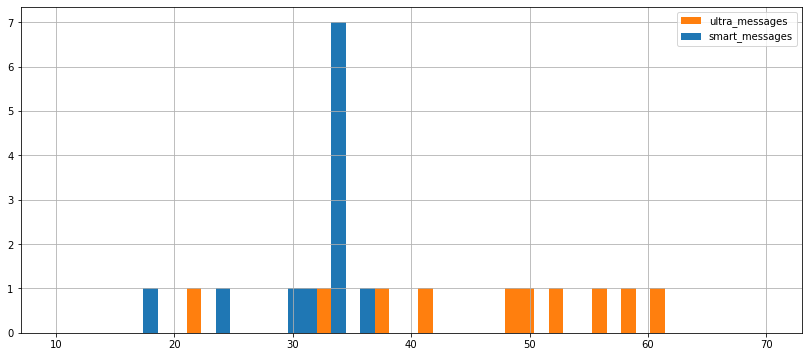

In [38]:
smart_messages = every_user_smart_traffic['mean']['amount_of_messages']
ultra_messages = every_user_ultra_traffic['mean']['amount_of_messages']
bins = np.linspace(10, 70)
plt.figure(figsize=(14,6))
plt.hist([smart_messages, ultra_messages], bins, label=['smart_messages', 'ultra_messages'], histtype='stepfilled')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

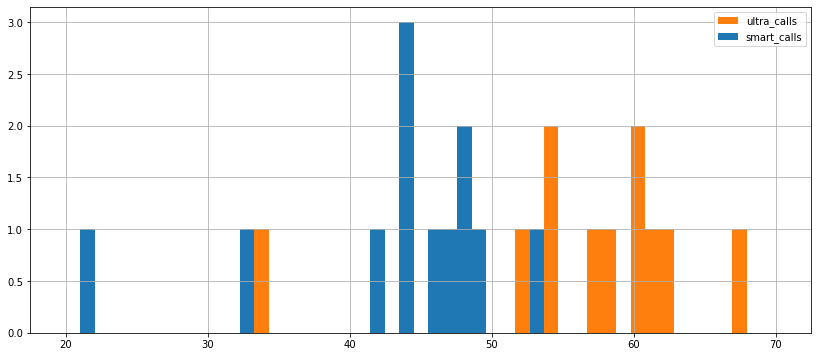

In [39]:
smart_calls = every_user_smart_traffic['mean']['duration_in_min']
ultra_calls = every_user_ultra_traffic['mean']['duration_in_min']
bins = np.linspace(20, 70)
plt.figure(figsize=(14,6))
plt.hist([smart_calls, ultra_calls], bins, label=['smart_calls', 'ultra_calls'], histtype='stepfilled')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

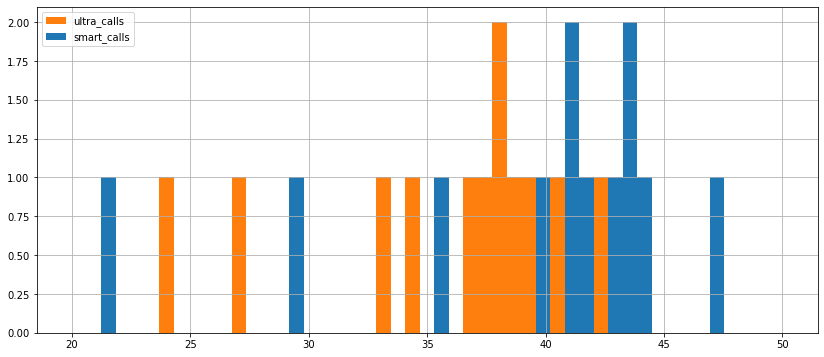

In [40]:
smart_internet = every_user_smart_traffic['mean']['gb_used']
ultra_internet = every_user_ultra_traffic['mean']['gb_used']
bins = np.linspace(20, 50)
plt.figure(figsize=(14,6))
plt.hist([smart_internet, ultra_internet], bins, label=['smart_calls', 'ultra_calls'], histtype='stepfilled')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

Проверим гипотезу о том, что средние выручки пользователей тарифов Ультра и Смарт не отличаются

In [41]:
ultra_user_data = every_user_data_tariff.query('tariff == "ultra"').groupby('user_id')[['income']].sum()
smart_user_data = every_user_data_tariff.query('tariff == "smart"').groupby('user_id')[['income']].sum()
print('Кол-во юзеров тарифа Ультра: {}'.format(ultra_user_data.shape[0]))
print('Кол-во юзеров тарифа Смарт {}'.format(smart_user_data.shape[0]))

Кол-во юзеров тарифа Ультра: 148
Кол-во юзеров тарифа Смарт 350


Непропорционально кол-во пользователей. Сократим в обоих случаях до 100.

In [42]:
ultra_user_100data = ultra_user_data[1:101]
smart_user_100data = smart_user_data[1:101]

Проверяем гипотезу о равенстве средней выручки двух генеральных совокупностей (двум тарифам) по взятым выборкам

In [43]:
sample_1 = ultra_user_100data['income'].values.tolist()
sample_2 = smart_user_100data['income'].values.tolist()
results = st.ttest_ind(sample_1, sample_2, equal_var = True)
print('p-значение: {}'.format(results.pvalue))
alpha = .05

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: между двумя тарифами есть значимая разница в доходе')
else:
    print('Не получилось отвергнуть нулевую гипотезу, нет оснований считать разницу доходов ощутимой')

p-значение: 9.313529130701925e-06
Отвергаем нулевую гипотезу: между двумя тарифами есть значимая разница в доходе


Проверим, кто в среднем приносит больше дохода

In [44]:
print('Средний доход с пользователя за год по тарифу Ультра {:.2f} рублей'.format(ultra_user_100data['income'].mean()))
print('Медианный доход с пользователя за год по тарифу Ультра {:.2f} рублей'.format(ultra_user_100data['income'].median()))

Средний доход с пользователя за год по тарифу Ультра 24778.50 рублей
Медианный доход с пользователя за год по тарифу Ультра 19950.00 рублей


In [45]:
print('Средний доход с пользователя за год по тарифу Смарт {:.2f} рублей'.format(smart_user_100data['income'].mean()))
print('Медианный доход с пользователя за год по тарифу Смарт {:.2f} рублей'.format(smart_user_100data['income'].median()))

Средний доход с пользователя за год по тарифу Смарт 38872.59 рублей
Медианный доход с пользователя за год по тарифу Смарт 37942.00 рублей


Действительно - тариф Смарт более выгодный. По среднему почти в полтора раза выше, а по медианному - в два раза.

И наконец проверим гипотезу о равенстве средней выручки пользователей из Москвы и из других регионов

In [46]:
moscow_data_tariff = every_user_data_tariff.query('city == "Москва"').groupby('user_id')[['income']].sum()
regional_data_tariff = every_user_data_tariff.query('city != "Москва"').groupby('user_id')[['income']].sum()
print('Кол-во юзеров из Москвы: {}'.format(moscow_data_tariff.shape[0]))
print('Кол-во юзеров из других регионов {}'.format(regional_data_tariff.shape[0]))

Кол-во юзеров из Москвы: 99
Кол-во юзеров из других регионов 399


Сократим кол-во юзеров из других регионов также до 99

In [47]:
regional_data_tariff = regional_data_tariff[1:100]

Проверяем гипотезу о равенстве средней выручки двух генеральных совокупностей (по разным регионам) по взятым выборкам

In [48]:
sample_1 = moscow_data_tariff['income'].values.tolist()
sample_2 = regional_data_tariff['income'].values.tolist()
results = st.ttest_ind(sample_1, sample_2, equal_var = True)
print('p-значение: {}'.format(results.pvalue))
alpha = .05

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: между Москвой и другими регионами есть значимая разница в среднем доходе')
else:
    print('Не получилось отвергнуть нулевую гипотезу, нет оснований считать разницу доходов ощутимой между Москвой и другими регионами')

p-значение: 0.4598503722735542
Не получилось отвергнуть нулевую гипотезу, нет оснований считать разницу доходов ощутимой между Москвой и другими регионами


Значение P равно почти 0,5, что почти с твердой уверенностью можно говорить - разницы между регионами практически нет. Посмотрим по среднему и медиане

In [49]:
print('Средний доход с пользователя из Москвы {:.2f} рублей'.format(moscow_data_tariff['income'].mean()))
print('Медианный доход с пользователя из Москвы {:.2f} рублей'.format(moscow_data_tariff['income'].median()))

Средний доход с пользователя из Москвы 32847.53 рублей
Медианный доход с пользователя из Москвы 29100.00 рублей


In [50]:
print('Средний доход с пользователя из других регионов {:.2f} рублей'.format(regional_data_tariff['income'].mean()))
print('Медианный доход с пользователя из других регионов {:.2f} рублей'.format(regional_data_tariff['income'].median()))

Средний доход с пользователя из других регионов 35313.89 рублей
Медианный доход с пользователя из других регионов 29650.00 рублей


В самомо деле - средний доход из других регионов превышает всего на 2,5тыс. рублей, а медианный так и вообще практически на одном уровне - разница всего в 50 рублей!

Общие выводы: если по звонкам и СМСкам прослеживается логичная тенденция - чем дороже тариф, тем чаще пользуешься в среднем услугами связи. Однако в отношении трафика интернета картина неоднозначная. Скорее даже абоненты более дешевого тарифа пользуются интернетом больше и вдобавок переплачивают за дополнительные гигабайты. Даже если взять минимальный трафик из обычной тенденции - в 40 гигабайт, то они оплачивают дополнительно 5000 рублей в среднем, а могли бы всего 1500 с тарифом Ультра. Подтвердим в вычислениях на примере.

Пример: Предположим, что пользователь тарифа Смарт не переплачивает за звонки и сообщения, но его трафик по интернету составил 40 гб. Сравним, на каком тарифе ему выгоднее находиться, если за переплату за 1 гб интернета по тарифу Смарт полагается 200 рублей, а по тарифу Ультра - 150 рублей.

Оплата по тарифу Смарт = 550(тариф Смарт) + 25 (столько гб превышено по лимиту) * 200 (цена за гб) = 5550 рублей

Оплата по тарифу Ультра = 1950(тариф Ультра) + 10 (столько гб превышено по лимиту) * 150 (цена за гб) = 3450 рублей

Разница более чем в две тысячи рублей, и это только по минимальному значению потребления трафика из общей тенденции. Стоит тем пользователям, которые находятся на тарифе Смарт и превышают лимит испрользования интернета, предложить перейти на тариф Ультра, ведь это более выгодное для них предложение. 